In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/HP/Desktop/Programming/Projects/Prasunet Intern Projects/Project 2-k Means/dataset/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df = df.drop(['CustomerID'], axis=1)

In [10]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [12]:
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [40]:
def initialize_centroids(data, k):
    return data[:k]


In [75]:
k = 5
centroids = initialize_centroids(features.values, k)
centroids

array([[ 0, 19, 15, 39],
       [ 0, 21, 15, 81],
       [ 1, 20, 16,  6],
       [ 1, 23, 16, 77],
       [ 1, 31, 17, 40]], dtype=int64)

In [76]:
def assign_clusters(data, centroids):
    m = data.shape[0]
    k = centroids.shape[0]
    distances = np.zeros((m, k))
    for i in range(m):
        for j in range(k):
            distances[i, j] = np.sqrt(np.sum((data[i] - centroids[j]) ** 2))
    clusters = np.argmin(distances, axis=1)
    
    return clusters


In [77]:
clusters = assign_clusters(features.values, centroids)
print("Initial Clusters:\n", clusters)

Initial Clusters:
 [0 1 2 3 4 3 2 1 2 3 4 1 4 3 2 3 4 3 4 1 4 3 2 3 4 3 4 3 4 1 2 3 2 1 2 3 2
 3 4 3 4 1 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 4 3 4 3 2 3 4 3 2 3 2 3 2 3 2 3 4 3 2 3 4 3
 4 3 4 3 4 3 4 3 2 3 2 3 4 3 2 3 4 3 4 3 4 3 2 3 2 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 2 3 4 3 4 3 4 3]


In [78]:
def update_centroids(data, clusters, k):
    n = data.shape[1]  # Number of features
    centroids = np.zeros((k, n))  # Initialize new centroids array
    
    for i in range(k):
        cluster_data = data[clusters == i]
        centroids[i] = np.mean(cluster_data, axis=0)
    
    return centroids


In [79]:
centroids = update_centroids(features.values, clusters, k)
print("Updated Centroids:\n", centroids)


Updated Centroids:
 [[ 0.         19.         15.         39.        ]
 [ 0.57142857 25.57142857 25.         91.85714286]
 [ 0.33333333 38.9047619  56.9047619   7.52380952]
 [ 0.54385965 30.1754386  68.43859649 78.68421053]
 [ 0.61403509 44.16666667 59.87719298 41.35964912]]


In [80]:
def kmeans(data, k, max_iterations=500):
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, clusters

In [81]:
final_centroids, final_clusters = kmeans(features.values, k)
print("Final Centroids:\n", final_centroids)
print("Final Clusters:\n", final_clusters)

Final Centroids:
 [[ 0.60869565 45.2173913  26.30434783 20.91304348]
 [ 0.60869565 25.52173913 26.30434783 78.56521739]
 [ 0.47222222 40.66666667 87.75       17.58333333]
 [ 0.53846154 32.69230769 86.53846154 82.12820513]
 [ 0.58227848 43.08860759 55.29113924 49.56962025]]
Final Clusters:
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 2 3 4 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 4 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


In [82]:
import matplotlib.pyplot as plt

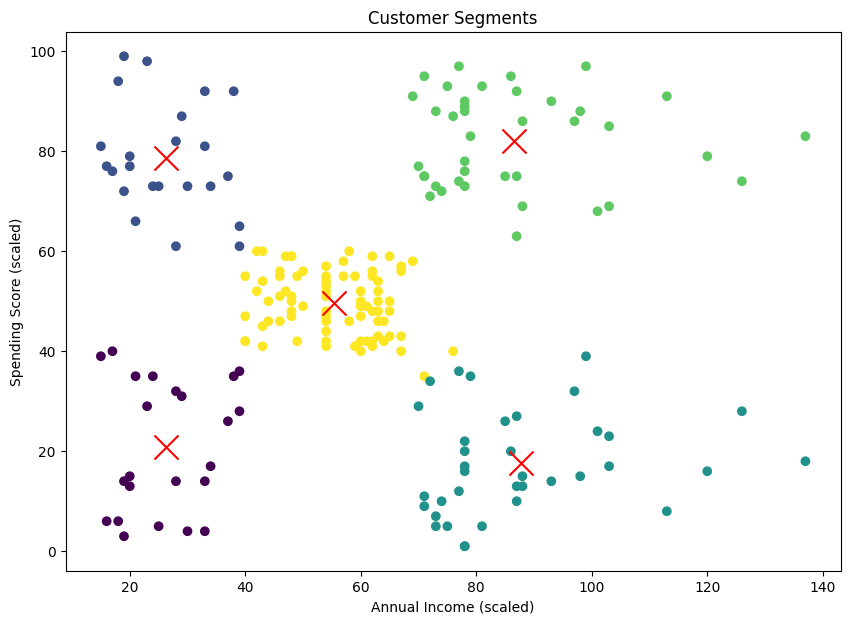

In [83]:
plt.figure(figsize=(10, 7))
plt.scatter(features.values[:, 2], features.values[:, 3], c=final_clusters, cmap='viridis')
plt.scatter(final_centroids[:, 2], final_centroids[:, 3], s=300, c='red', marker='x')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()